In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# DATASET:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


this is the overall dataset where we have 14 features and income is the target variable. considering all the features. i will have to prdict the income above 50k or below 50k means I will have to use classification to train the model.data contain object and numerical both datatypes.

In [3]:
df.shape

(32560, 15)

we have total 32560 rows and 15 columns

In [4]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

data does not have any null values.

In [7]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

I can see here the target variable income data is imbalnced. to train a better model i will have to make income 

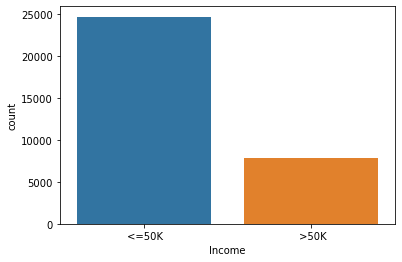

In [8]:
sns.countplot(df['Income']);

In [9]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('*********************************************************')
        

Workclass:[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
*********************************************************
Education:[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th     

here I can see the count for each data column.In columns- workclass,occupation,native_country,category names are missing.

# visualisation:

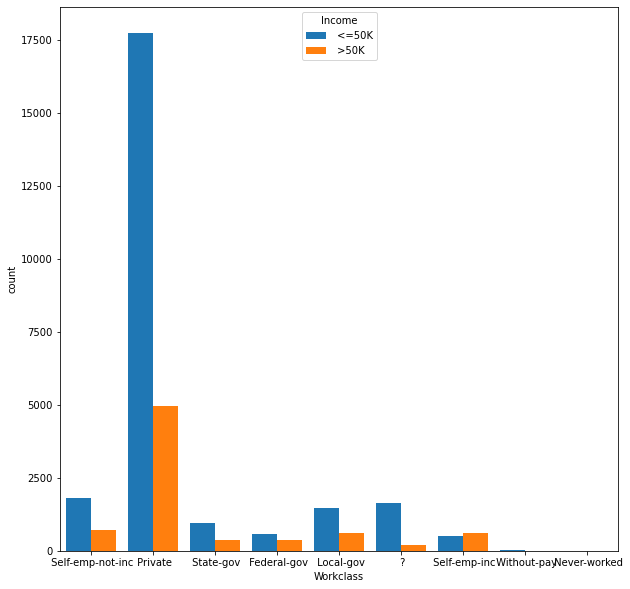

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(df['Workclass'], hue=df['Income'],saturation=1,)
plt.show()

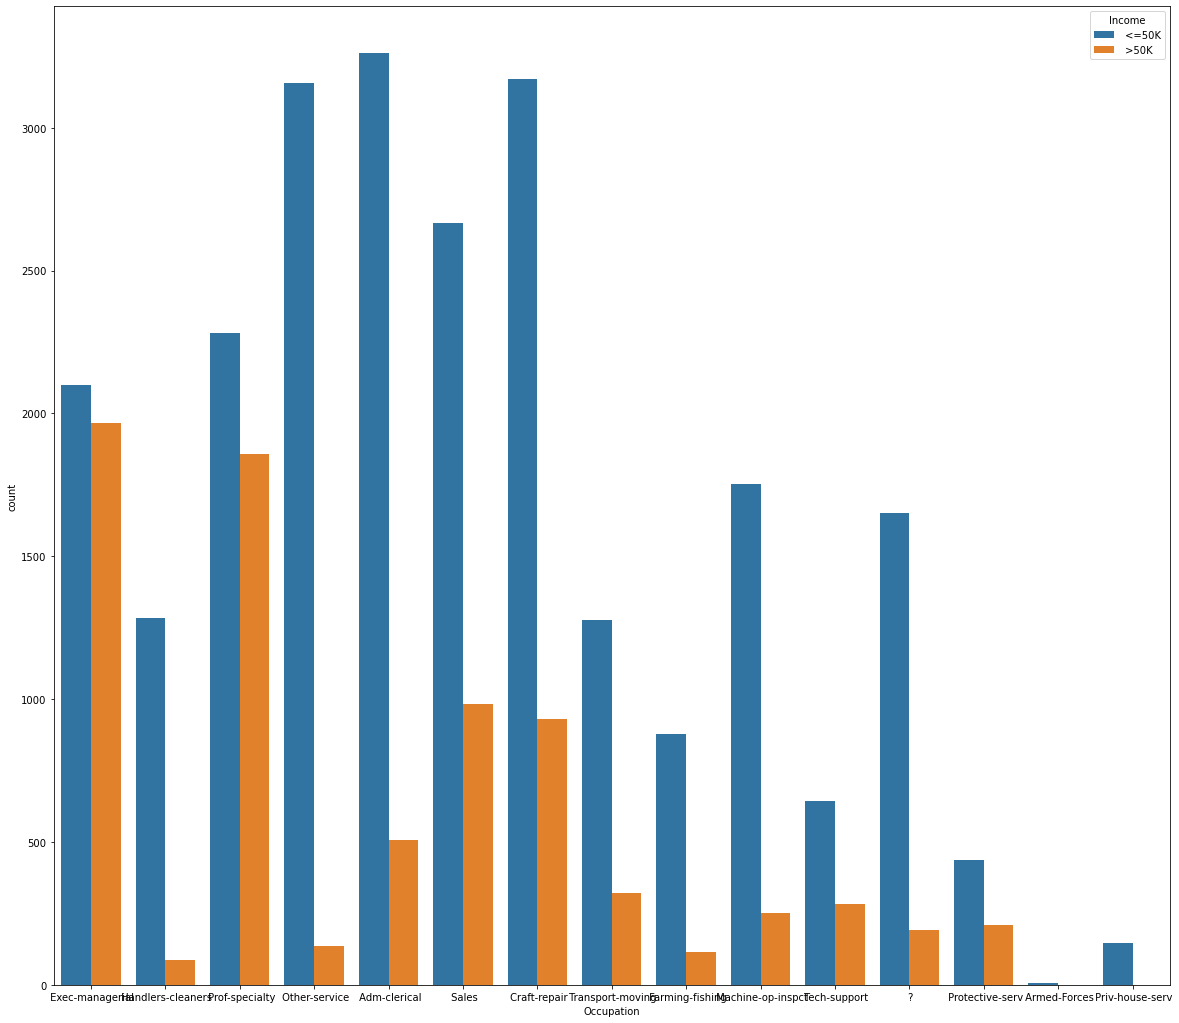

In [11]:
plt.figure(figsize=(20,18))
sns.countplot(df['Occupation'], hue=df['Income'])
plt.show()

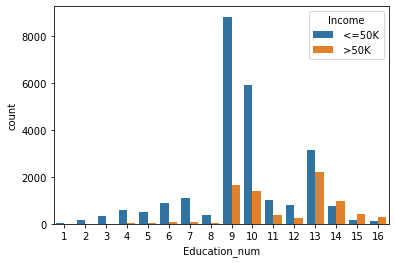

In [12]:
sns.countplot(df['Education_num'], hue=df['Income'])
plt.show()

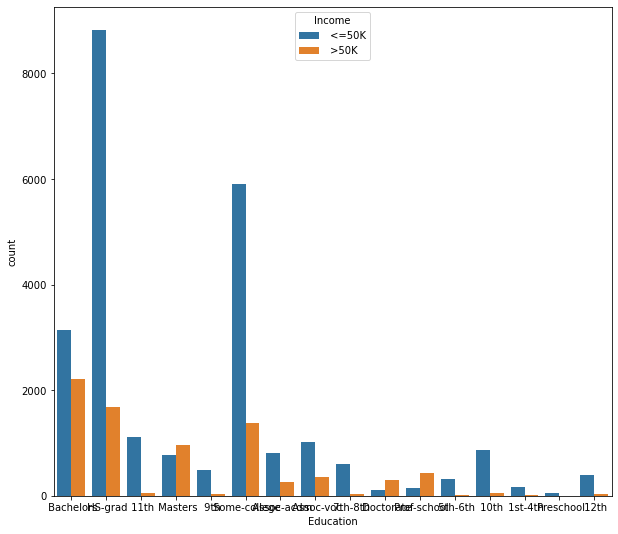

In [13]:
plt.figure(figsize=(10,9))
sns.countplot(df['Education'], hue=df['Income'])
plt.show()

here I have plotted various graphs to show the distribution of income over other features.bachloers and graduates earn more than 50k as compared to school and college.private sectors employee earn mre than government employees.

In [14]:
columns_with_nan = ['Workclass','Occupation','Native_country']

In [15]:
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [18]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


Here I have converted all object data into numerical using labelecnoder

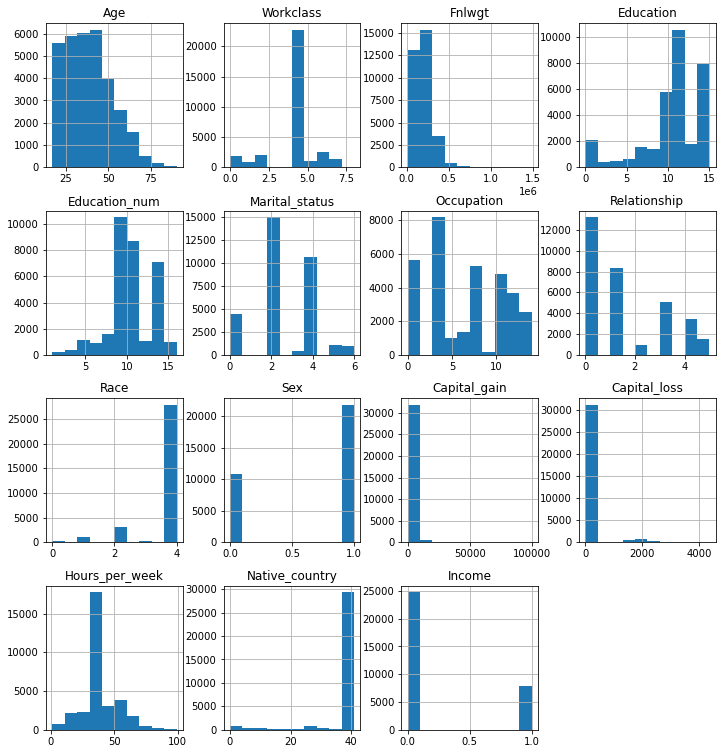

In [19]:
df.hist(figsize = (12,13));

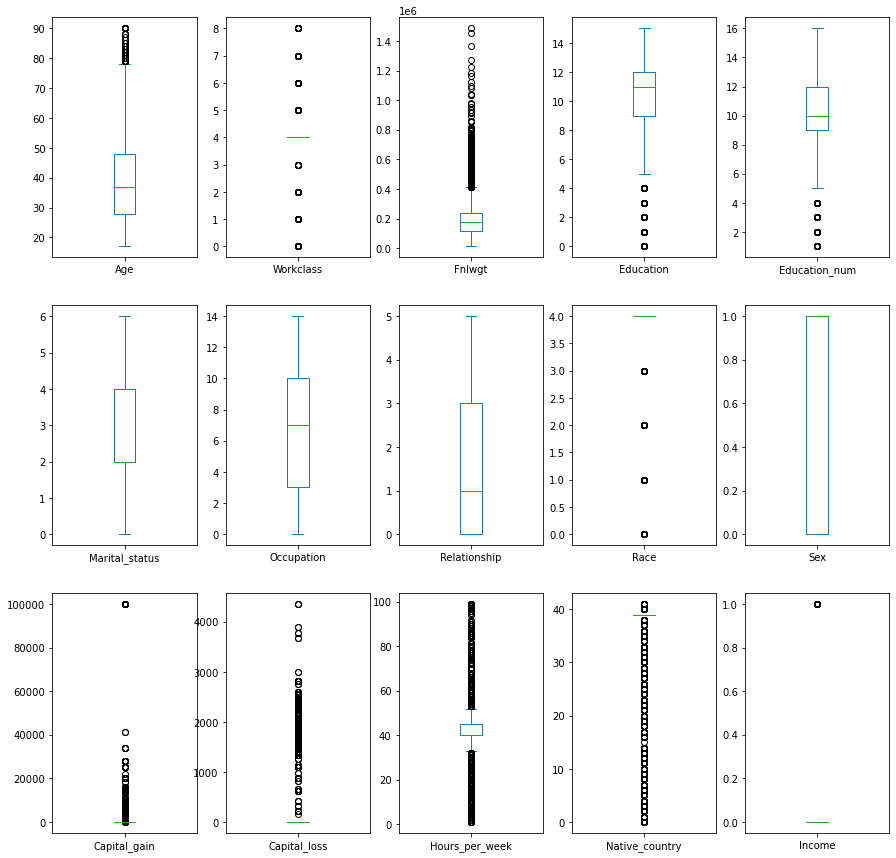

In [20]:
df.plot(kind='box',figsize=(15,15),layout=(3,5),sharex=False,subplots=True);

In [21]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


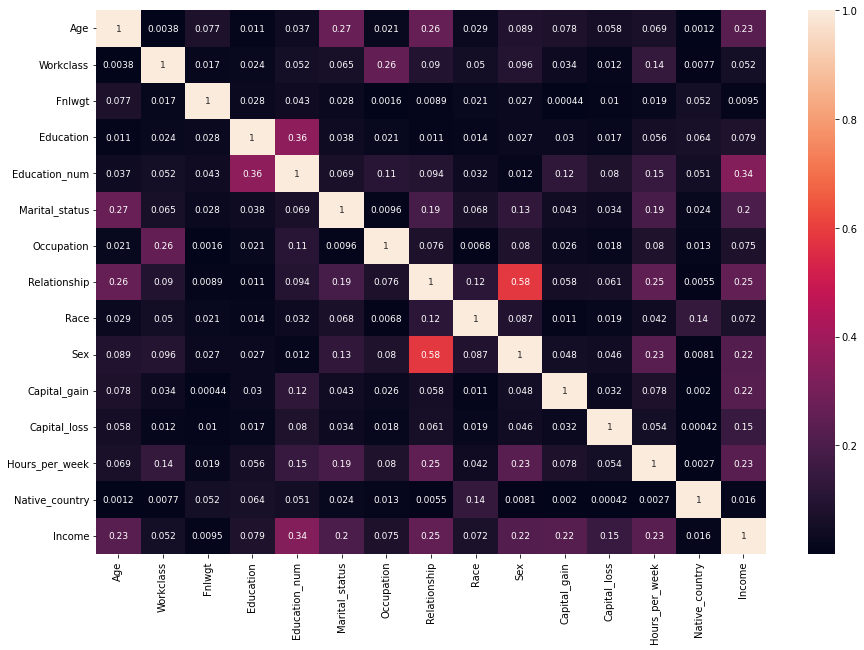

In [22]:
df_corr = df.corr().abs()

plt.figure(figsize =(15,10))
sns.heatmap(df_corr,annot = True, annot_kws={'size':9})
plt.show()

From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week and sex.

# SKEWNESS

In [23]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

here we can see the skewness for columns age and fnlwgt as others having categorical data. 

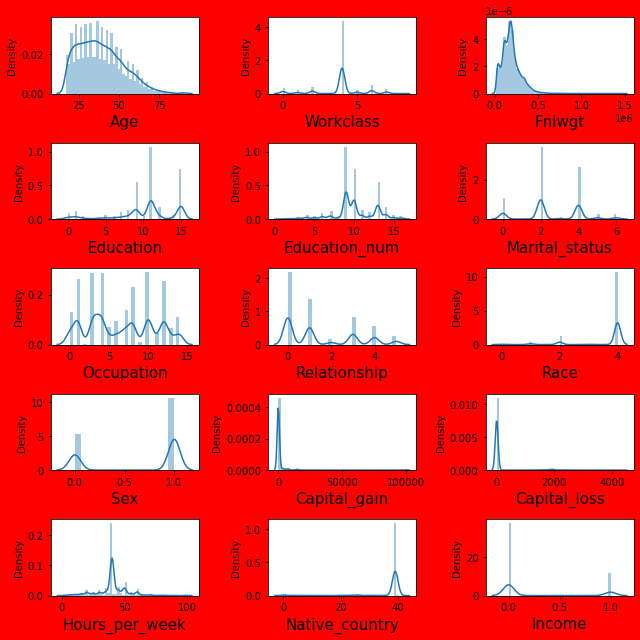

In [24]:
plt.figure(figsize =(9,9),facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize =15)

    plotnumber+=1
plt.tight_layout()


In [25]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [26]:
df['Age'] = np.log(df['Age'])
df['Fnlwgt'] = np.log(df['Fnlwgt'])

In [27]:
df.skew()

Age               -0.131709
Workclass         -0.752280
Fnlwgt            -0.842578
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

here we I can see for age and fnlwgt i have removed skewness.

# Outliers Remove

In our data most of the features contain categorical data. so I will have to remove outliers for those features which has continuos data.The columns which I have to deal to remove outliers are - Age,fnlwgt and hours per week.

In [28]:
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3-q1

In [29]:
fnlwt_high = (q3.Fnlwgt + (1.5 *iqr.Fnlwgt))
fnlwt_high

outliers1 = np.where(df['Fnlwgt'] > fnlwt_high)
df = df.drop(df.index[outliers1])
print(df.shape)
df.reset_index()

(32483, 15)


,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,3.912023,6,11.330336,9,13,2,4,0,4,1,0,0,13,39,0
1,1,3.637586,4,12.281393,11,9,0,6,1,4,1,0,0,40,39,0
2,2,3.970292,4,12.366153,1,7,2,6,0,2,1,0,0,40,39,0
3,3,3.332205,4,12.732011,9,13,2,10,5,2,0,0,0,40,5,0
4,4,3.610918,4,12.558777,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32478,32555,3.295837,4,12.458006,7,12,2,13,5,4,0,0,0,38,39,0
32479,32556,3.688879,4,11.947134,11,9,2,7,0,4,1,0,0,40,39,1
32480,32557,4.060443,4,11.931044,11,9,6,1,4,4,0,0,0,40,39,0
32481,32558,3.091042,4,12.213495,11,9,4,1,3,4,1,0,0,20,39,0


In [30]:
hours_high = (q3.Hours_per_week + (1.5 *iqr.Hours_per_week))
hours_high

outliers2 = np.where(df['Hours_per_week'] > hours_high)
df = df.drop(df.index[outliers2])
print(df.shape)
df.reset_index()

(28998, 15)


,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,3.912023,6,11.330336,9,13,2,4,0,4,1,0,0,13,39,0
1,1,3.637586,4,12.281393,11,9,0,6,1,4,1,0,0,40,39,0
2,2,3.970292,4,12.366153,1,7,2,6,0,2,1,0,0,40,39,0
3,3,3.332205,4,12.732011,9,13,2,10,5,2,0,0,0,40,5,0
4,4,3.610918,4,12.558777,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28993,32555,3.295837,4,12.458006,7,12,2,13,5,4,0,0,0,38,39,0
28994,32556,3.688879,4,11.947134,11,9,2,7,0,4,1,0,0,40,39,1
28995,32557,4.060443,4,11.931044,11,9,6,1,4,4,0,0,0,40,39,0
28996,32558,3.091042,4,12.213495,11,9,4,1,3,4,1,0,0,20,39,0


In [31]:
age_high = (q3.Age + (1.5 *iqr.Age))
age_high

outliers3 = np.where(df['Age'] > age_high)
df = df.drop(df.index[outliers3])
print(df.shape)
df.reset_index()

(28998, 15)


,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,3.912023,6,11.330336,9,13,2,4,0,4,1,0,0,13,39,0
1,1,3.637586,4,12.281393,11,9,0,6,1,4,1,0,0,40,39,0
2,2,3.970292,4,12.366153,1,7,2,6,0,2,1,0,0,40,39,0
3,3,3.332205,4,12.732011,9,13,2,10,5,2,0,0,0,40,5,0
4,4,3.610918,4,12.558777,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28993,32555,3.295837,4,12.458006,7,12,2,13,5,4,0,0,0,38,39,0
28994,32556,3.688879,4,11.947134,11,9,2,7,0,4,1,0,0,40,39,1
28995,32557,4.060443,4,11.931044,11,9,6,1,4,4,0,0,0,40,39,0
28996,32558,3.091042,4,12.213495,11,9,4,1,3,4,1,0,0,20,39,0


so here i have removed outliers for those three columns.

In [32]:
X = df.drop('Income', axis=1)
Y = df['Income']

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
Ext = ExtraTreesClassifier(random_state=53)

In [34]:
Ext.fit(X, Y)

ExtraTreesClassifier(random_state=53)

In [35]:
feature_imp = Ext.feature_importances_

In [36]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 16.26
1 4.55
2 16.97
3 3.74
4 8.87
5 7.04
6 7.94
7 9.51
8 1.59
9 2.5
10 8.83
11 2.65
12 7.7
13 1.85


In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28998 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             28998 non-null  float64
 1   Workclass       28998 non-null  int32  
 2   Fnlwgt          28998 non-null  float64
 3   Education       28998 non-null  int32  
 4   Education_num   28998 non-null  int64  
 5   Marital_status  28998 non-null  int32  
 6   Occupation      28998 non-null  int32  
 7   Relationship    28998 non-null  int32  
 8   Race            28998 non-null  int32  
 9   Sex             28998 non-null  int32  
 10  Capital_gain    28998 non-null  int64  
 11  Capital_loss    28998 non-null  int64  
 12  Hours_per_week  28998 non-null  int64  
 13  Native_country  28998 non-null  int32  
dtypes: float64(2), int32(8), int64(4)
memory usage: 3.4 MB


In [38]:
X = X.drop(['Native_country','Capital_loss','Sex','Race','Education'],axis=1)  
y= df['Income']

In [39]:
X

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Capital_gain,Hours_per_week
0,3.912023,6,11.330336,13,2,4,0,0,13
1,3.637586,4,12.281393,9,0,6,1,0,40
2,3.970292,4,12.366153,7,2,6,0,0,40
3,3.332205,4,12.732011,13,2,10,5,0,40
4,3.610918,4,12.558777,14,2,4,5,0,40
...,...,...,...,...,...,...,...,...,...
32555,3.295837,4,12.458006,12,2,13,5,0,38
32556,3.688879,4,11.947134,9,2,7,0,0,40
32557,4.060443,4,11.931044,9,6,1,4,0,40
32558,3.091042,4,12.213495,9,4,1,3,0,20


I will use this top features to train the model,according to ExtratreeClassifier.

# SCALING

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
SMOTE()

SMOTE()

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y)

In [44]:
from collections import Counter
ove_smp = SMOTE(0.75)
x_train_s,y_train_s = ove_smp.fit_resample(x_train,y_train)
print('the number of the classes before fit {}'.format(Counter(y_train)))
print('the number of the classes after fit {}'.format(Counter(y_train_s)))

the number of the classes before fit Counter({0: 16935, 1: 4813})
the number of the classes after fit Counter({0: 16935, 1: 12701})


I have applied here smote method to balance the counts in target variable.

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [46]:
MaxAccu=0
MaxR=0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,random_state = i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    print('accuracy',acc,'random_state',i)
    
    if acc>MaxAccu:
        MaxAccu = acc
        MaxR=i
        print('accuracy',MaxAccu,'random_state',i)
   

accuracy 0.8358620689655173 random_state 0
accuracy 0.8358620689655173 random_state 0
accuracy 0.8374137931034483 random_state 1
accuracy 0.8374137931034483 random_state 1
accuracy 0.8432758620689655 random_state 2
accuracy 0.8432758620689655 random_state 2
accuracy 0.8334482758620689 random_state 3
accuracy 0.835 random_state 4
accuracy 0.8427586206896551 random_state 5
accuracy 0.8355172413793104 random_state 6
accuracy 0.8432758620689655 random_state 7
accuracy 0.84 random_state 8
accuracy 0.8346551724137931 random_state 9
accuracy 0.8310344827586207 random_state 10
accuracy 0.8329310344827586 random_state 11
accuracy 0.8389655172413794 random_state 12
accuracy 0.8412068965517241 random_state 13
accuracy 0.8377586206896551 random_state 14
accuracy 0.8386206896551724 random_state 15
accuracy 0.8358620689655173 random_state 16
accuracy 0.8318965517241379 random_state 17
accuracy 0.8410344827586207 random_state 18
accuracy 0.8405172413793104 random_state 19
accuracy 0.8393103448275862 

In [47]:
print('Best Acuracy',MaxAccu,'Random State',MaxR)

Best Acuracy 0.8458620689655172 Random State 55


In [48]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predt = dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,predt))
print(confusion_matrix(y_test,predt))
print(classification_report(y_test,predt))

Accuracy 0.815
[[4015  568]
 [ 505  712]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4583
           1       0.56      0.59      0.57      1217

    accuracy                           0.81      5800
   macro avg       0.72      0.73      0.73      5800
weighted avg       0.82      0.81      0.82      5800



In [49]:
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier()
rt.fit(x_train,y_train)
prert = rt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prert))
print(confusion_matrix(y_test,prert))
print(classification_report(y_test,prert))

Accuracy 0.8601724137931035
[[4259  324]
 [ 487  730]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4583
           1       0.69      0.60      0.64      1217

    accuracy                           0.86      5800
   macro avg       0.79      0.76      0.78      5800
weighted avg       0.85      0.86      0.86      5800



In [50]:
from sklearn.svm import SVC

st = SVC()
st.fit(x_train,y_train)
prest = st.predict(x_test)
print('Accuracy',accuracy_score(y_test,prest))
print(confusion_matrix(y_test,prest))
print(classification_report(y_test,prest))

Accuracy 0.8612068965517241
[[4365  218]
 [ 587  630]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4583
           1       0.74      0.52      0.61      1217

    accuracy                           0.86      5800
   macro avg       0.81      0.74      0.76      5800
weighted avg       0.85      0.86      0.85      5800



In [51]:
from sklearn.ensemble import AdaBoostClassifier

at = AdaBoostClassifier()
at.fit(x_train,y_train)
preat = at.predict(x_test)
print('Accuracy',accuracy_score(y_test,preat))
print(confusion_matrix(y_test,preat))
print(classification_report(y_test,preat))


Accuracy 0.8677586206896551
[[4297  286]
 [ 481  736]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4583
           1       0.72      0.60      0.66      1217

    accuracy                           0.87      5800
   macro avg       0.81      0.77      0.79      5800
weighted avg       0.86      0.87      0.86      5800



In [52]:
from sklearn.ensemble import BaggingClassifier

bt = BaggingClassifier()
bt.fit(x_train,y_train)
prebt = bt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prebt))
print(confusion_matrix(y_test,prebt))
print(classification_report(y_test,prebt))


Accuracy 0.8501724137931035
[[4249  334]
 [ 535  682]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4583
           1       0.67      0.56      0.61      1217

    accuracy                           0.85      5800
   macro avg       0.78      0.74      0.76      5800
weighted avg       0.84      0.85      0.85      5800



In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
prekt = knn.predict(x_test)
print('Accuracy',accuracy_score(y_test,prekt))
print(confusion_matrix(y_test,prekt))
print(classification_report(y_test,prekt))


Accuracy 0.8448275862068966
[[4196  387]
 [ 513  704]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4583
           1       0.65      0.58      0.61      1217

    accuracy                           0.84      5800
   macro avg       0.77      0.75      0.76      5800
weighted avg       0.84      0.84      0.84      5800



In [54]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x_train,y_train)
prext = knn.predict(x_test)
print('Accuracy',accuracy_score(y_test,prext))
print(confusion_matrix(y_test,prext))
print(classification_report(y_test,prext))


Accuracy 0.8448275862068966
[[4196  387]
 [ 513  704]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4583
           1       0.65      0.58      0.61      1217

    accuracy                           0.84      5800
   macro avg       0.77      0.75      0.76      5800
weighted avg       0.84      0.84      0.84      5800



Here I have trained the model using various methods and SVC and Adaboost are giving me the highest accuracy score which is 86%

# CROSS VALIDATION

In [55]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,X_scaled,y,cv=3)
print("Cross Validation Score for Logistic Classification Model is:-",scr.mean())

Cross Validation Score for Logistic Classification Model is:- 0.8364369956548727


In [56]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dt,X_scaled,y,cv=3)
print("Cross Validation Score for Decision Tree Classifier is:-",scr.mean())

Cross Validation Score for Decision Tree Classifier is:- 0.814021656665977


In [57]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rt,X_scaled,y,cv=3)
print("Cross Validation Score for Random Forest Classifier Model is:-",scr.mean())

Cross Validation Score for Random Forest Classifier Model is:- 0.8579902062211188


In [58]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(at,X_scaled,y,cv=3)
print("Cross Validation Score for AdaboostClassifier Model is:-",scr.mean())

Cross Validation Score for AdaboostClassifier Model is:- 0.8644044416856335


In [59]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(bt,X_scaled,y,cv=3)
print("Cross Validation Score for Bagging Classifier Model is:-",scr.mean())

Cross Validation Score for Bagging Classifier Model is:- 0.8491275260362783


In [60]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(xgb,X_scaled,y,cv=3)
print("Cross Validation Score for XGB Model is:-",scr.mean())

Cross Validation Score for XGB Model is:- 0.8678529553762329


In [61]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(knn,X_scaled,y,cv=3)
print("Cross Validation Score for knn Classifier Model is:-",scr.mean())

Cross Validation Score for knn Classifier Model is:- 0.8432995378991656


In [62]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(st,X_scaled,y,cv=3)
print("Cross Validation Score for SVC Model is:-",scr.mean())

Cross Validation Score for SVC Model is:- 0.8579902062211188


From above cross validation scores I can see the AdaboostClassifier is giving high acuracy and high cross validation score which is 86%. So I am using this model to apply hyperparameter tuning.

# HyperPatameter Tuning

In [63]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10,11,12,14,15],'learning_rate':[2.1,0.2,0.10,1.0]}


In [64]:
GCV = GridSearchCV(AdaBoostClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'learning_rate': 1.0, 'n_estimators': 12}

In [65]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [66]:
GCV.best_estimator_

AdaBoostClassifier(n_estimators=12)

In [67]:
GCV_pred = GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8568965517241379

<function matplotlib.pyplot.show(close=None, block=None)>

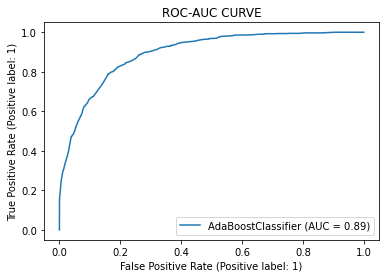

In [68]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC-AUC CURVE')
plt.show

here its giving True Positive rate 89%. so this woul be our best model.

In [69]:
import joblib
joblib.dump(GCV.best_estimator_,'census income model.pkl')

['census income model.pkl']